In [1]:
from scripts.utils import *
from scripts.embedding_fabric import EmbeddingFabric
from scripts.indexer import Indexer
from scripts.metrics import *
from scripts.model import *
from scripts.training_model import *
from scripts.visual_util import *

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
TRAIN_PATH = 'data/train.txt'
DEV_PATH = 'data/dev.txt'
TEST_PATH = 'data/test.txt'
EMBEDDINGS_PATH = 'embeddings/glove.6B.100d.txt'

In [4]:
glove = load_embedding_dict(EMBEDDINGS_PATH)

100%|███████████████████████████████████████████████████████████████████████| 400000/400000 [00:27<00:00, 14732.91it/s]


In [5]:
words, tags = read_ner_data_from_connl(TRAIN_PATH)

In [6]:
val_words, val_tags = read_ner_data_from_connl(DEV_PATH)

In [7]:
test_words, test_tags = read_ner_data_from_connl(TEST_PATH)

In [8]:
data_dict = {
    'train': (words, tags),
    'dev': (val_words, val_tags),
    'test': (test_words, test_tags)
}

In [9]:
words_indexer = Indexer(words)
tags_indexer = Indexer(tags)

In [10]:
EMBEDDING_DIM = 100
HIDDEN_DIM = 100

In [11]:
models = {}

In [12]:
for strat in ['a', 'b', 'c']:
    strategy = f"strategy_{strat}"
    model = LSTMTagger(EMBEDDING_DIM, HIDDEN_DIM,
                   tags_indexer.size(), 
                   lambda: EmbeddingFabric.get_embedding_layer(words_indexer, glove, strategy))
    
    models[strategy] = model

In [13]:
labels = [x for x in tags_indexer.get_element_to_index_dict().values()]

In [14]:
plotting_data = {}
trained_models = {}

In [15]:
for name, model in models.items():
    print(f"Training {name} model")
    loss_function = nn.NLLLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.1)
    
    metric_handler = MetricsHandler(labels)
    valid_metric = MetricsHandler(labels)
    
    model, train, valid, losses = train_model(model, optimizer,
                                  loss_function,
                                  data_dict, 
                                  128, #batch size 
                                  words_indexer, 
                                  tags_indexer, 
                                  metric_handler, 
                                  valid_metric,
                                  num_epochs=5)
    
    plotting_data[name] = (train.get_metrics(), losses, valid.get_metrics())

Training strategy_a model
Epoch 1/5
----------


100%|██████████████████████████████████████████████████████████████████████████████| 1591/1591 [07:18<00:00,  3.97it/s]
C:\Repos\learning_and_trying_stuff\nlp\homeworks\hw5\scripts\metrics.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return x[1, 1]/(x[1, 1] + x[0, 1])
C:\Repos\learning_and_trying_stuff\nlp\homeworks\hw5\scripts\metrics.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return x[1, 1] / (x[1, 0] + x[1, 1])
C:\Repos\learning_and_trying_stuff\nlp\homeworks\hw5\scripts\metrics.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return ((1 + beta**2)*precision*recall)/(beta**2 * precision + recall)


Loss per epoch - 58.54782414728557
Precision - 0.3313582184813263
Recall - 0.2083937441865348
F1-score - 0.33733330276000245
F0.5-score - 0.37663110454236426

Validating on dev test: 
Precision - 0.4382243073805724
Recall - 0.3037401175443209
F1-score - 0.5057173360523184
F0.5-score - 0.4592387508927045


Epoch 2/5
----------


100%|██████████████████████████████████████████████████████████████████████████████| 1591/1591 [07:44<00:00,  2.92it/s]


Loss per epoch - 47.228198301260164
Precision - 0.5204403820027927
Recall - 0.3486982458037166
F1-score - 0.45496705055639
F0.5-score - 0.4712187663726041

Validating on dev test: 
Precision - 0.6357243089624067
Recall - 0.34568942342506903
F1-score - 0.44123350124734184
F0.5-score - 0.44794707248182375


Epoch 3/5
----------


100%|██████████████████████████████████████████████████████████████████████████████| 1591/1591 [07:55<00:00,  3.74it/s]


Loss per epoch - 41.62275202299798
Precision - 0.5739299766945981
Recall - 0.4190402379876619
F1-score - 0.48640565010729814
F0.5-score - 0.509695805132926

Validating on dev test: 
Precision - 0.5001781871537228
Recall - 0.39577295917091426
F1-score - 0.4003278087769853
F0.5-score - 0.42267465421307054


Epoch 4/5
----------


100%|██████████████████████████████████████████████████████████████████████████████| 1591/1591 [07:51<00:00,  3.08it/s]


Loss per epoch - 38.77849146419355
Precision - 0.5634071980270571
Recall - 0.4511277397058021
F1-score - 0.47077010588873286
F0.5-score - 0.49600390380849174

Validating on dev test: 
Precision - 0.49286950203392843
Recall - 0.43482624438248135
F1-score - 0.4495557319444906
F0.5-score - 0.4619381608389526


Epoch 5/5
----------


100%|██████████████████████████████████████████████████████████████████████████████| 1591/1591 [08:21<00:00,  3.55it/s]


Loss per epoch - 35.9784349146165
Precision - 0.5894327323847601
Recall - 0.4848025579226553
F1-score - 0.5064884864803754
F0.5-score - 0.5337888264811735

Validating on dev test: 
Precision - 0.5038357077918418
Recall - 0.4705610786419217
F1-score - 0.49189059054051815
F0.5-score - 0.4925240514938218


Training strategy_b model
Epoch 1/5
----------


100%|██████████████████████████████████████████████████████████████████████████████| 1591/1591 [08:05<00:00,  3.60it/s]


Loss per epoch - 59.0842340696184
Precision - 0.533210761086331
Recall - 0.2728447690430642
F1-score - 0.40303499411331006
F0.5-score - 0.4745192125029733

Validating on dev test: 
Precision - 0.7661610597773223
Recall - 0.41144117662941565
F1-score - 0.588621042744902
F0.5-score - 0.6554756752269976


Epoch 2/5
----------


100%|██████████████████████████████████████████████████████████████████████████████| 1591/1591 [08:04<00:00,  3.56it/s]


Loss per epoch - 32.80472155020231
Precision - 0.7456012007353318
Recall - 0.5415722366350078
F1-score - 0.5749461367079005
F0.5-score - 0.6168077404031433

Validating on dev test: 
Precision - 0.8072120395166369
Recall - 0.5302525655151938
F1-score - 0.5993716668356207
F0.5-score - 0.672995895810849


Epoch 3/5
----------


100%|██████████████████████████████████████████████████████████████████████████████| 1591/1591 [08:45<00:00,  3.03it/s]


Loss per epoch - 25.101068672900265
Precision - 0.8028218151119505
Recall - 0.6609023738509425
F1-score - 0.7094918675015598
F0.5-score - 0.7554409405681537

Validating on dev test: 
Precision - 0.8454503067666586
Recall - 0.6042738884058031
F1-score - 0.6825958634390233
F0.5-score - 0.7589022004888972


Epoch 4/5
----------


100%|██████████████████████████████████████████████████████████████████████████████| 1591/1591 [09:40<00:00,  3.13it/s]


Loss per epoch - 21.48771400787147
Precision - 0.8240172933934814
Recall - 0.7109052454520081
F1-score - 0.7542795873488797
F0.5-score - 0.7910285265266832

Validating on dev test: 
Precision - 0.8543228734733407
Recall - 0.6399507139275167
F1-score - 0.7157519580581126
F0.5-score - 0.7852095849128538


Epoch 5/5
----------


100%|██████████████████████████████████████████████████████████████████████████████| 1591/1591 [07:46<00:00,  4.14it/s]


Loss per epoch - 19.189804256632033
Precision - 0.8417560366864691
Recall - 0.7409411316317253
F1-score - 0.7812095606202778
F0.5-score - 0.8138902782073988

Validating on dev test: 
Precision - 0.853391602796162
Recall - 0.6620872131811155
F1-score - 0.7342267023445218
F0.5-score - 0.7966132389559646


Training strategy_c model
Epoch 1/5
----------


100%|██████████████████████████████████████████████████████████████████████████████| 1591/1591 [07:45<00:00,  3.70it/s]


Loss per epoch - 60.09301040926158
Precision - 0.44618666136434104
Recall - 0.26279385283862716
F1-score - 0.3828116853834437
F0.5-score - 0.4444039278241418

Validating on dev test: 
Precision - 0.76733601763419
Recall - 0.39414198360528996
F1-score - 0.5667335364375854
F0.5-score - 0.6425357129921246


Epoch 2/5
----------


100%|██████████████████████████████████████████████████████████████████████████████| 1591/1591 [07:45<00:00,  3.71it/s]


Loss per epoch - 33.08381199216708
Precision - 0.7284054092447941
Recall - 0.531814843700509
F1-score - 0.5666361249490459
F0.5-score - 0.6095813160762952

Validating on dev test: 
Precision - 0.7743717150795473
Recall - 0.5252581754981901
F1-score - 0.5912171831150606
F0.5-score - 0.6578286514676783


Epoch 3/5
----------


100%|██████████████████████████████████████████████████████████████████████████████| 1591/1591 [08:14<00:00,  3.37it/s]


Loss per epoch - 25.001165381213035
Precision - 0.8012193535552692
Recall - 0.6601327033498562
F1-score - 0.7091471183265728
F0.5-score - 0.7549345305143571

Validating on dev test: 
Precision - 0.8378054415829699
Recall - 0.6013013634474036
F1-score - 0.6779274599344266
F0.5-score - 0.7535784260583736


Epoch 4/5
----------


100%|██████████████████████████████████████████████████████████████████████████████| 1591/1591 [07:51<00:00,  4.05it/s]


Loss per epoch - 21.318621697734354
Precision - 0.8235579945670727
Recall - 0.7134742939651867
F1-score - 0.7566965830477524
F0.5-score - 0.7925301280640378

Validating on dev test: 
Precision - 0.8480458770290187
Recall - 0.6346449898618274
F1-score - 0.7094982287948874
F0.5-score - 0.7790416370176144


Epoch 5/5
----------


100%|██████████████████████████████████████████████████████████████████████████████| 1591/1591 [07:01<00:00,  3.88it/s]


Loss per epoch - 18.97476088037652
Precision - 0.8379341718701289
Recall - 0.7449979799755513
F1-score - 0.783172193155967
F0.5-score - 0.8132317265975131

Validating on dev test: 
Precision - 0.8573871625721196
Recall - 0.6621022397735891
F1-score - 0.7341585250946773
F0.5-score - 0.7980493171206657




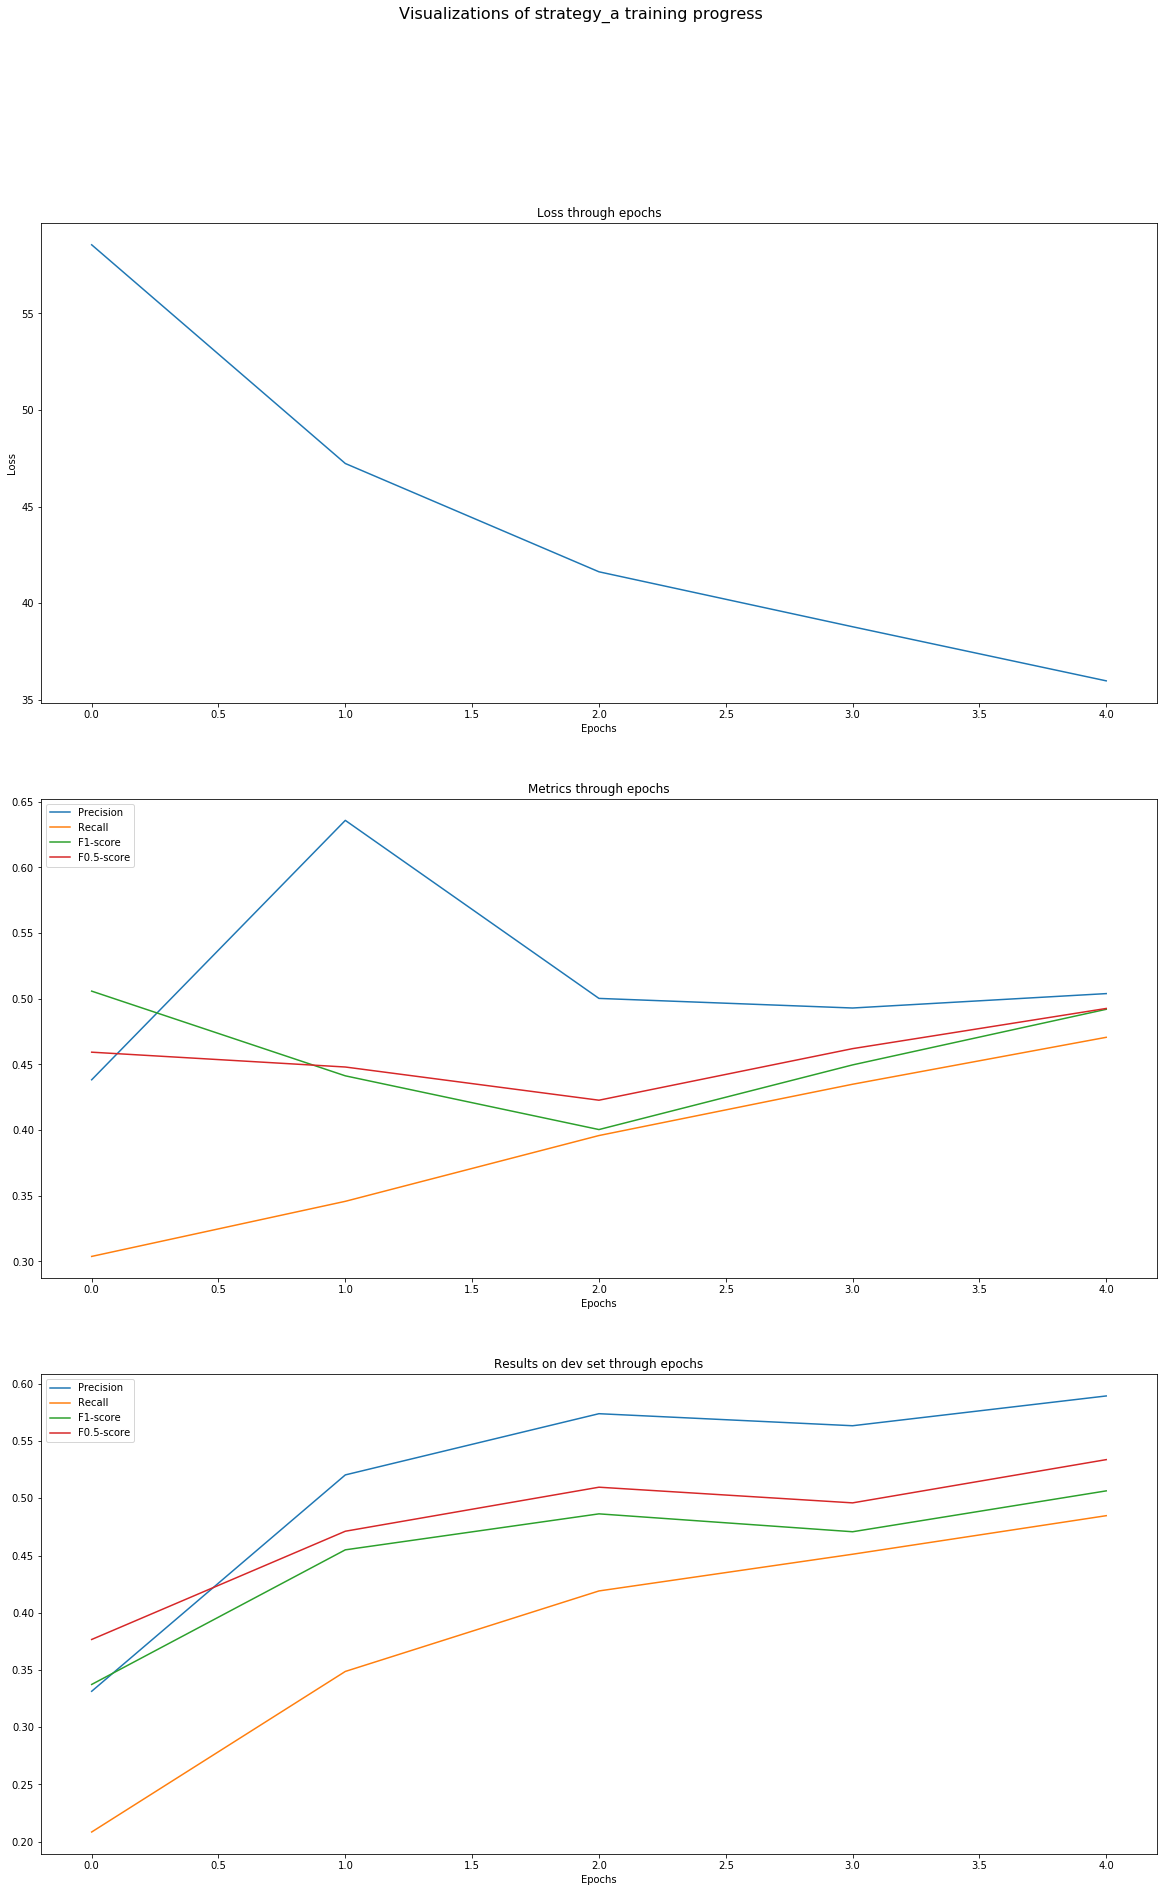

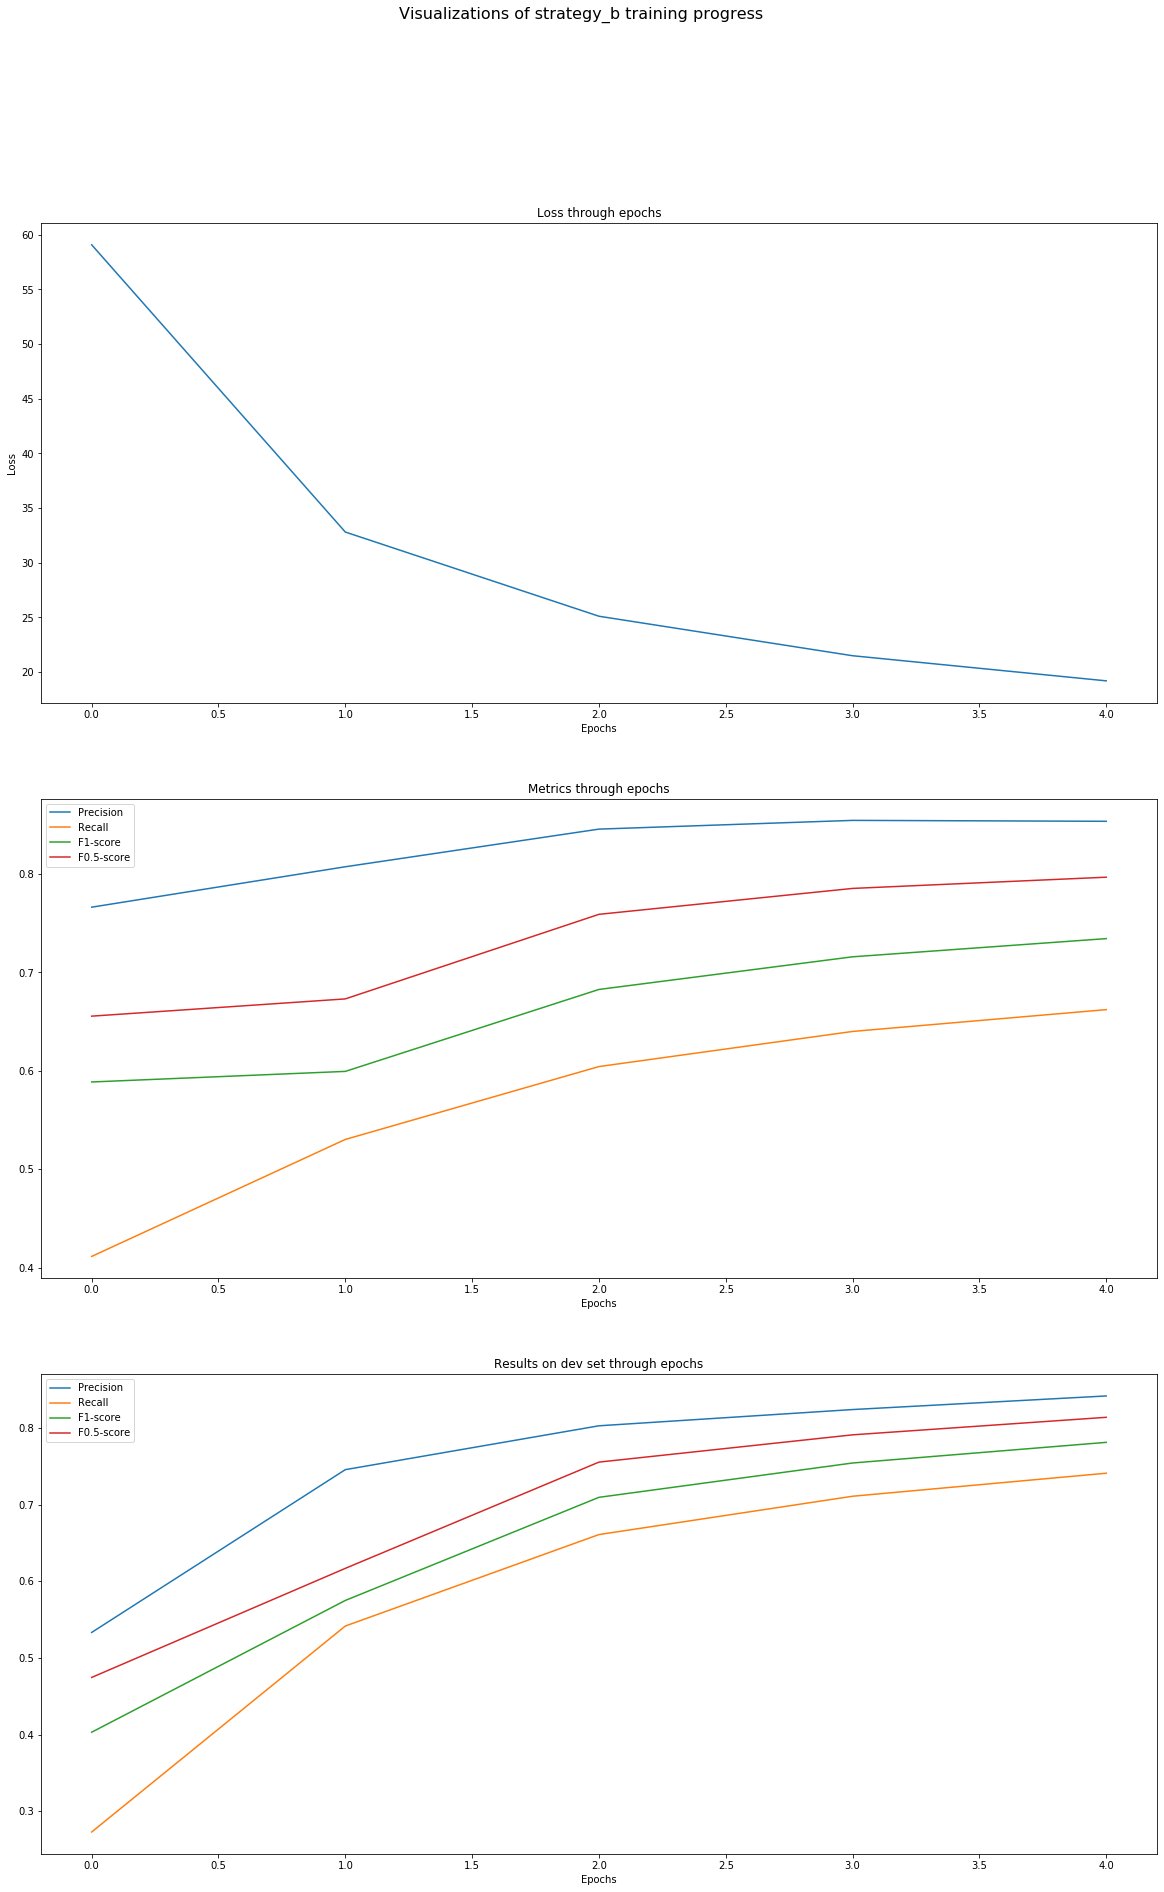

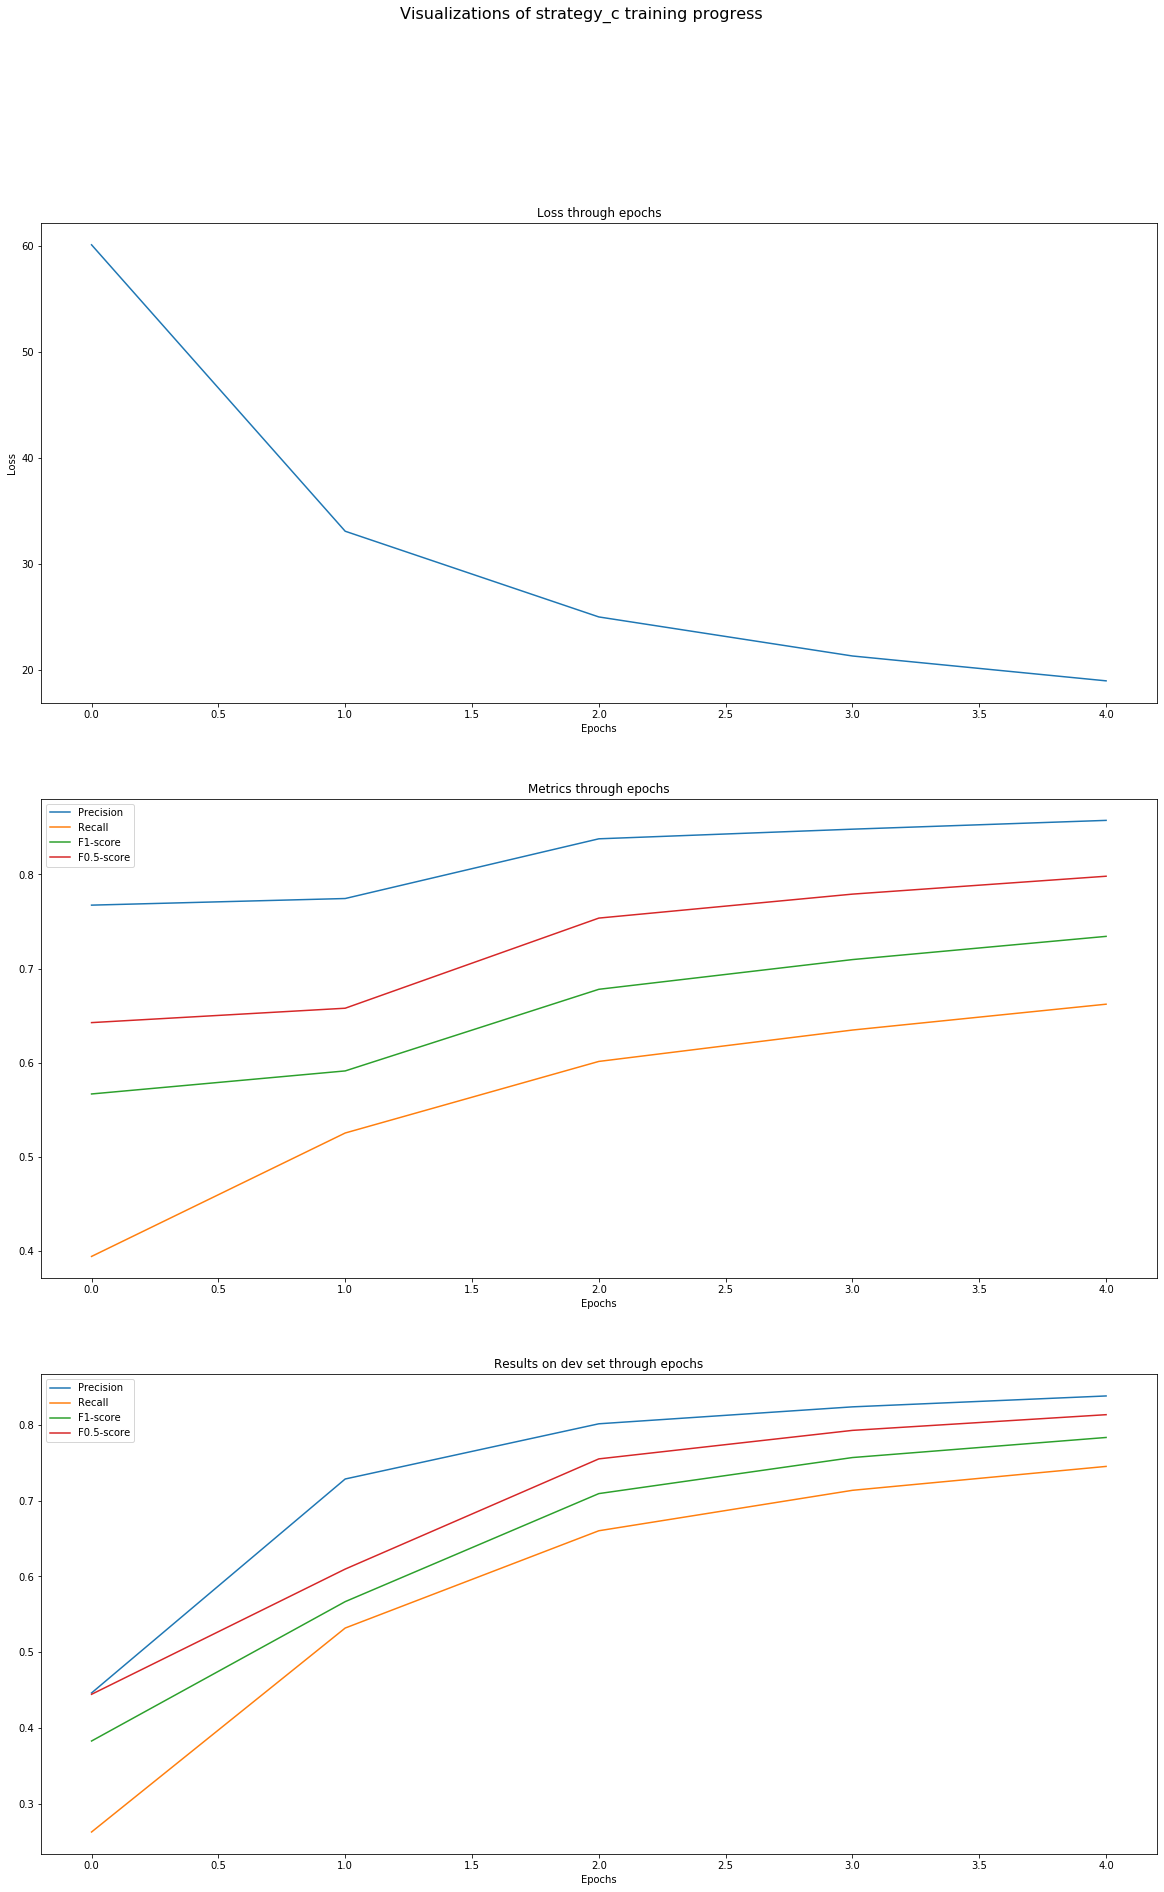

In [17]:
for name, plot_data in plotting_data.items():
    train, losses, valid = plot_data
    build_training_visualization(name, train, losses, valid, f'visualizations/{name}.png')

In [20]:
##Printing test set results
##TODO: Extract to scripts and merge with validate method

test_metrics = MetricsHandler(labels)

for name, model in models.items():
    print(f"{name} results on test set:")
    with torch.no_grad():
        inputs = torch.tensor(words_indexer.elements_to_index(test_words), dtype=torch.long)
        true_vals = tags_indexer.elements_to_index(test_tags)
        tag_scores = model(inputs)
        prediction = get_tag_indexes_from_scores(tag_scores)
        test_metrics.update(prediction, true_vals)
        test_metrics.collect()
        for metric in test_metrics.metrics_dict.keys():
            print(f"{metric} - {test_metrics.metrics_dict[metric][-1]}")
        print()

strategy_a results on test set:
Precision - 0.5140283971765577
Recall - 0.4660042691288599
F1-score - 0.43258446995592653
F0.5-score - 0.4359610025401879

strategy_b results on test set:
Precision - 0.8172928665187179
Recall - 0.6063374750523591
F1-score - 0.6890085575692121
F0.5-score - 0.7582608386368828

strategy_c results on test set:
Precision - 0.8212440570395734
Recall - 0.6033666775396797
F1-score - 0.6868141812878461
F0.5-score - 0.7584959482622308

